## Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.shape

(200, 5)

In [5]:
df.rename(columns = {'Annual Income (k$)' : 'Number of Customers','Spending Score (1-100)' : 'Customer purchases'}, inplace = 'Ture')

In [6]:
df.head()

,CustomerID,Gender,Age,Number of Customers,Customer purchases
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Number of Customers',
       'Customer purchases'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Number of Customers  200 non-null    int64 
 4   Customer purchases   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Number of Customers,Customer purchases
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Detecting and handling outliers

Text(0.5, 1.0, 'Number of Customers')

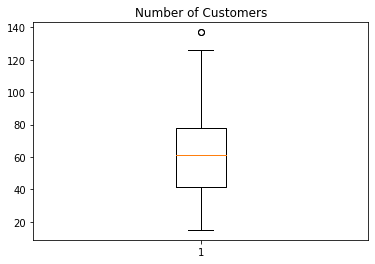

In [10]:
# Detecting outliers using a boxplot
plt.boxplot(df['Number of Customers'])
plt.title('Number of Customers')

Text(0.5, 1.0, 'Customer purchases')

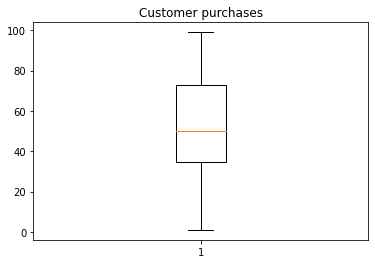

In [11]:
plt.boxplot(df['Customer purchases'])
plt.title('Customer purchases')

Text(0.5, 1.0, 'Boxplot of Age')

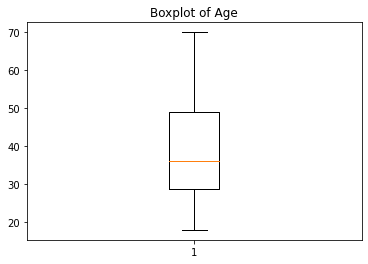

In [12]:
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')

In [13]:
# Handling outliers present in 'Annual Income'

In [14]:
Q1=np.percentile(df['Number of Customers'],25,interpolation='midpoint')
Q2=np.percentile(df['Number of Customers'],50,interpolation='midpoint')
Q3=np.percentile(df['Number of Customers'],75,interpolation='midpoint')

IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [15]:
low_limit

-14.5

In [16]:
up_limit

133.5

In [17]:
outlier=[]
for x in df['Number of Customers']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)

In [18]:
outlier

[137, 137]

In [19]:
outlier_index=df['Number of Customers']>up_limit
df.loc[outlier_index].index

Int64Index([198, 199], dtype='int64')

Text(0.5, 1.0, 'Boxplot of Annual Income')

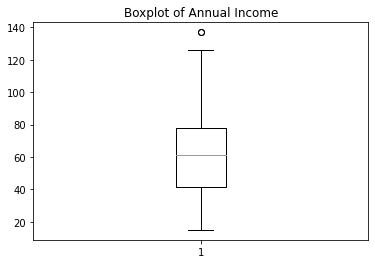

In [20]:
#checking too see if the outliers were removed 
plt.boxplot(df['Number of Customers'])
plt.title('Boxplot of Annual Income')

# EDA & Data Visualizations

## Univariate analysis

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

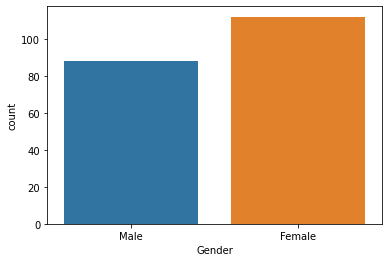

In [21]:
sns.countplot(df['Gender'])

In [22]:
#There are more number of females in the dataset when compared to males

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

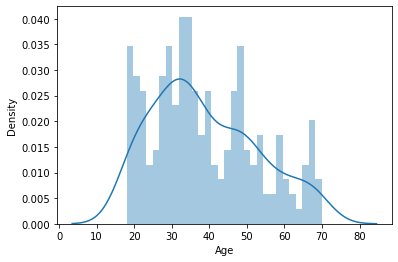

In [23]:
sns.distplot(df['Age'], bins=30)

In [24]:
#It is visible that the age column contains values that are almost normally distributed. 
#The kde on the distplot looks like a bell-curve.
#The majority of data points are relatively similar, meaning they occur within a small range of values with fewer outliers on the high and low ends of the data range.

Since, the categorical variables must be pre-processed before deploying the model, we will be converting our only categotical feature, 'Gender' by mapping each of its unique value 'Male'and 'Female' to 0 and 1 respectively.


In [25]:
#mapping the unique categorical values to 0 and 1
gender= {'Male':0, 'Female':1}
df['Gender']= df['Gender'].map(gender)

In [26]:
#To check if our mapping worked or not
df.head()

,CustomerID,Gender,Age,Number of Customers,Customer purchases
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Bivariate Analysis of numerical features
Bivariate analysis involves checking the relationship between two variables simultaneously.

Text(0.5, 1.0, 'Scatter plot between Age and income')

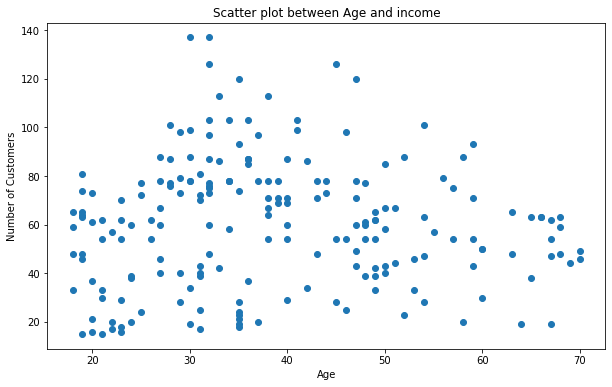

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Number of Customers'], marker='o');
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Scatter plot between Age and income')

In [28]:
#People between the age group of 20-40 roughly have the highest spending score or in other words, lower the age higher the spending score

Text(0.5, 1.0, 'Scatter plot between Age and Annual Income')

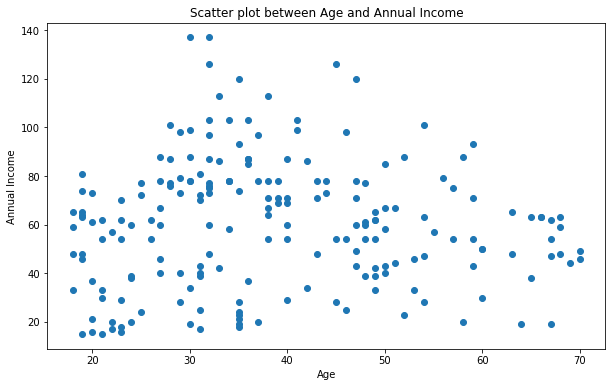

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Number of Customers'], marker='o');
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Scatter plot between Age and Annual Income')

In [30]:
#It can be concluded from the above scatter plot that people between the age group of 30-50 get the highest income.

Text(0.5, 1.0, 'Scatter plot between Annulal income and Spending Score')

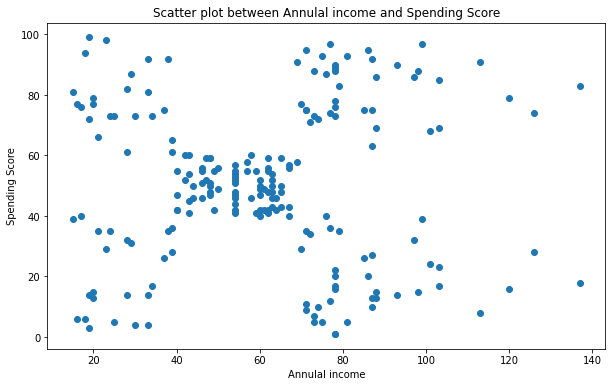

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(df['Number of Customers'],df['Customer purchases'], marker='o');
plt.xlabel('Annulal income')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Annulal income and Spending Score')

In [32]:
#Coincidentally, we can see that roughly Annual income of $40-60k corresponds to 40-60 spending score

Text(0.5, 1.0, 'Scatter plot between Gender and Spending Score')

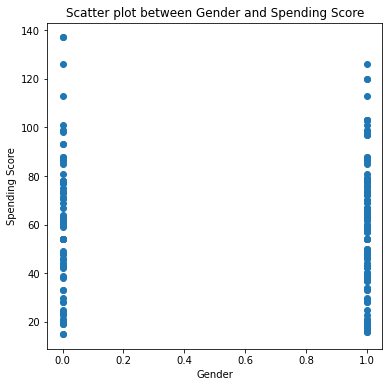

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(df['Gender'],df['Number of Customers'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Gender and Spending Score')

* The spending score correspoding to females (mapped to 1) is slighlty higher than the spending score of males. Females are slightly more likely to spend more

Text(0.5, 1.0, 'Scatter plot between Gender and Annual Income')

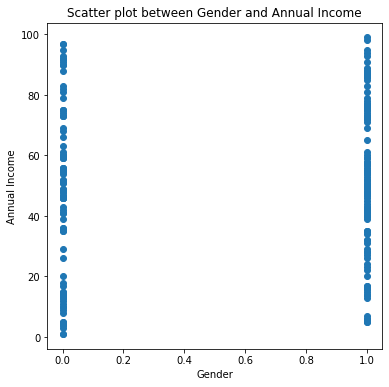

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(df['Gender'],df['Customer purchases'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.title('Scatter plot between Gender and Annual Income')

* There is hardly any difference in the annual income of both genders after removing outliers 

Text(0.5, 1.0, 'Scatter plot between Gender and Age')

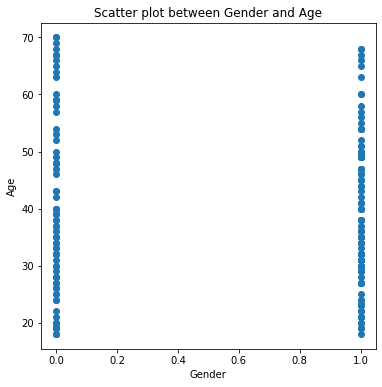

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(df['Gender'],df['Age'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Scatter plot between Gender and Age')

In [36]:
# All the above 3 graphs can be summarised using a pair plot

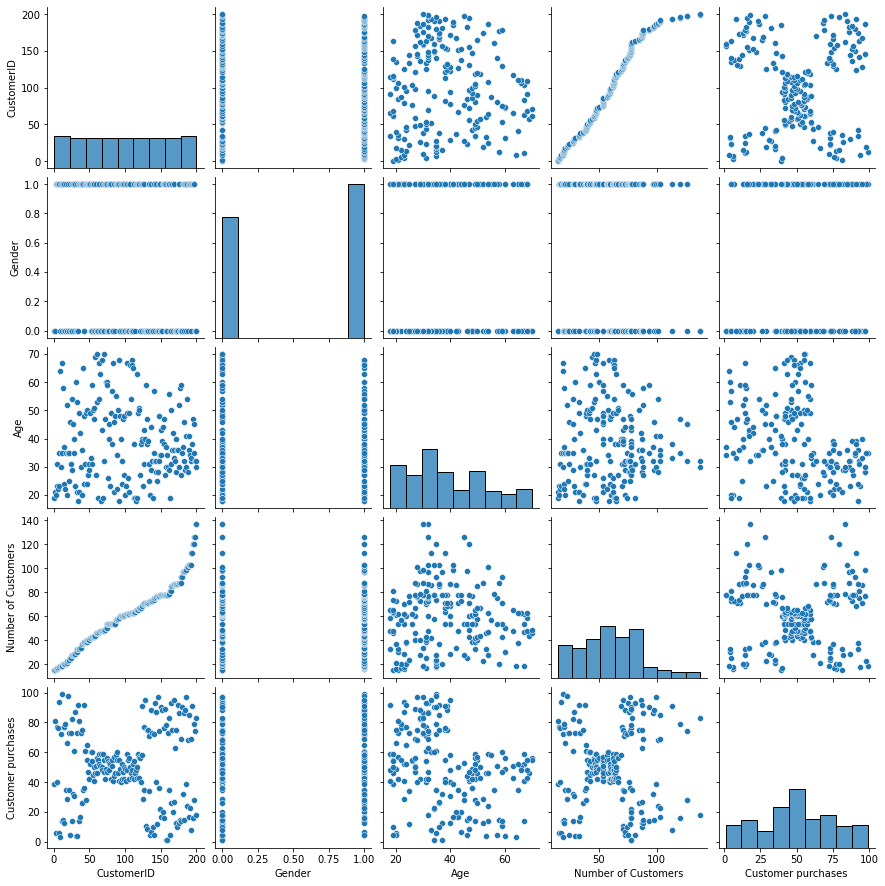

In [37]:
sns.pairplot(df)

In [38]:
#To check for correlation using a heatmap

<AxesSubplot:>

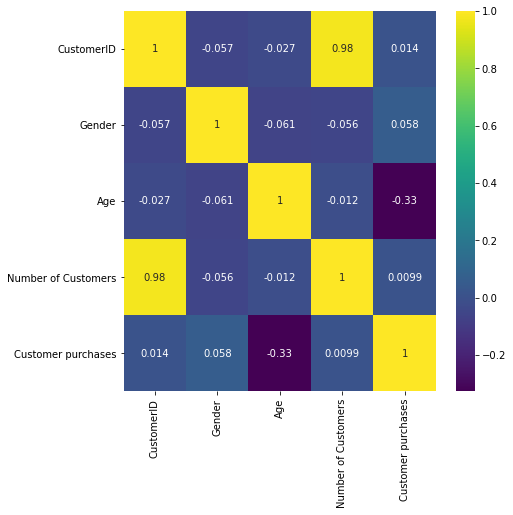

In [60]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

* From the above heatmap, we can find that 'Age' is negatively correlated with 'Spending Score'.
* 'Annual Income' is very less correlated with 'Age'
* 'Gender' is very less correlated with 'Spending Score' but more correlated, when compared to 'Annual Income'

In [40]:
#standard scaling the features to bring them around the same scale
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Age', 'Number of Customers','Customer purchases']])

In [41]:
#checking if it worked
df.head()

,CustomerID,Gender,Age,Number of Customers,Customer purchases
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Building the clustering model

In [42]:
#create a copy of the data variable
x = df.copy()

In [43]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=3)

In [44]:
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Customer purchases')

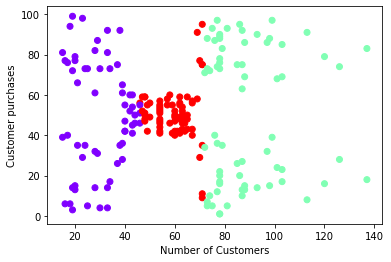

In [45]:
# Plot the data using the Annual Income and the Spending Score 
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
plt.scatter(clusters['Number of Customers'],clusters['Customer purchases'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Number of Customers')
plt.ylabel('Customer purchases')

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

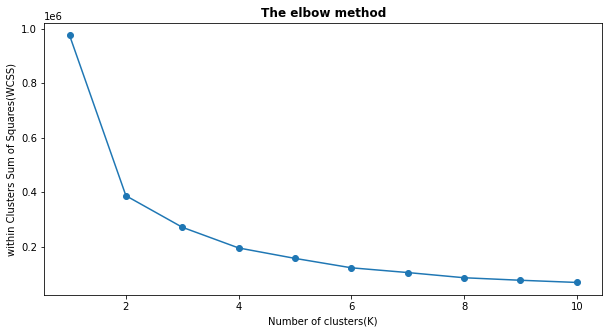

In [46]:
wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
# Plotting the results onto a line graph to help us observe 'The Elbow'
plt.figure(figsize=(10,5))
no_clusters=range(1,11)
plt.plot(no_clusters, wcss,marker = "o")
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)')

In [47]:
#Finding out the silhouette score to see if we have built a good model

In [48]:
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.39246890042565213


In [49]:
#assign the optimal number of clusters as 5
kmeans_new = KMeans(5)
# Fit the data
kmeans_new.fit(x)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)

#mapping the gender variable back to 'male' and 'female'
gender= {0:'Male',1:'Female'}
clusters_new['Gender']= clusters_new['Gender'].map(gender)

In [50]:
# Check if everything seems right
clusters_new.head()

,CustomerID,Gender,Age,Number of Customers,Customer purchases,cluster_pred
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [51]:
#Plotting the finally made clusters

Text(0, 0.5, 'Customer Purchases')

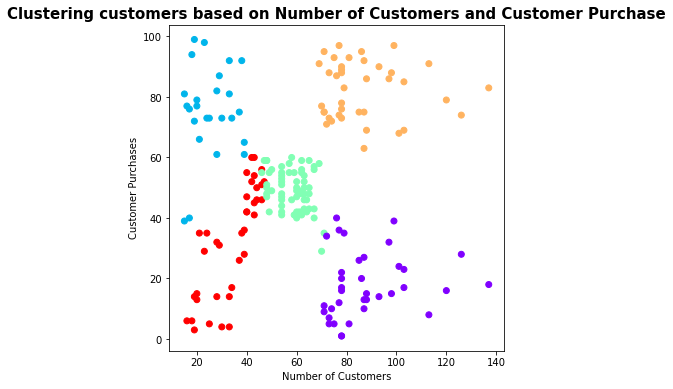

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(clusters_new['Number of Customers'],clusters_new['Customer purchases'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on Number of Customers and Customer Purchase", fontsize=15,fontweight="bold")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Purchases")

On the basis of the above graph, we can say that the clusters represent the following 5 groups:

1. High annual income, High Spending score

2. Low annual income, High spending score

3. High annual income, Low spending score

4. Low annual income, Low spending score

5. Intermediate annual income, Intermediate spending score


## Cluster Analysis

In [53]:
#Now we look into the built clusters deeper for better insights

In [54]:
#To compare attributes of the different clusters, lets find the average of all variables across each cluster
avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
avg_data

,cluster_pred,CustomerID,Age,Number of Customers,Customer purchases
0,0,164.000000,40.805556,87.916667,17.888889
1,1,22.320000,25.480000,25.480000,75.440000
2,2,94.031746,42.158730,58.301587,49.301587
3,3,162.000000,32.692308,86.538462,82.128205
4,4,37.729730,46.837838,34.108108,32.459459


<AxesSubplot:xlabel='cluster_pred', ylabel='Age'>

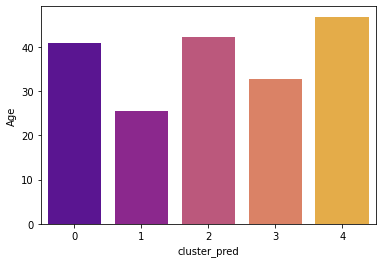

In [55]:
#To get a clearer picture, we use visualizations
sns.barplot(x='cluster_pred',y='Age',palette="plasma", data=avg_data)

<AxesSubplot:xlabel='cluster_pred', ylabel='Number of Customers'>

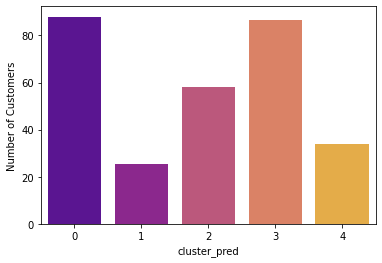

In [56]:
sns.barplot(x='cluster_pred',y='Number of Customers',palette="plasma", data=avg_data)

<AxesSubplot:xlabel='cluster_pred', ylabel='Customer purchases'>

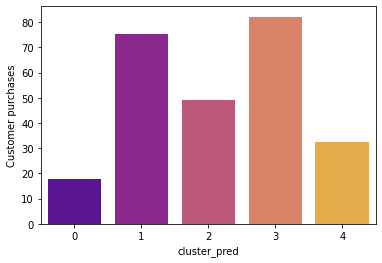

In [57]:
sns.barplot(x='cluster_pred',y='Customer purchases',palette="plasma", data=avg_data)

<AxesSubplot:xlabel='Number of Customers', ylabel='Customer purchases'>

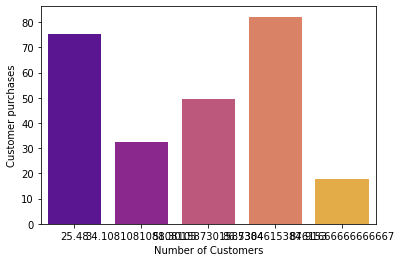

In [58]:
sns.barplot(x='Number of Customers',y='Customer purchases',palette="plasma", data=avg_data)

* Cluster 0, 1, 2, 3 are pre-dominantly female and cluster 4 has almost equal proportion. (PS: The dataset had a higher female population)

# Cluster Analysis

### Cluster 0: Almost pensioned ones
Average age is 45 years; Average Annual Income is 26k in dollars; pre-dominantly female; Avg Spending Score is 21

### Cluster 1: Highly well off customers
Average age is 32 years; Average Annual Income is 85k in dollars; pre-dominantly female; Avg Spending Score is 82

### Cluster 2: Middle-class customers
Average age is 43 years; Average Annual Income is 55k in dollars; pre-dominantly female; Avg Spending Score is 49

### Cluster 3: Careless spenders
Average age is 25 years; Average Annual Income is 26k in dollars; pre-dominantly female; Avg Spending Score is 78

### Cluster 4: Cautious spenders
Average age is 41 years; Average Annual Income is 86k in dollars; almost same proportion of females and males; Avg Spending Score is 17